#### Read in the Data

In [1]:
import pandas as pd
df = pd.read_csv('Terrorism Project - Raw Data.csv')
df = df[df['Incident Country'] == 'China']
df = df[['Report Year', 'Confirmed Death(s)', 'Weapon']]

import numpy as np
df['Confirmed Death(s)'] = np.where(df['Confirmed Death(s)'].isnull(), 0, df['Confirmed Death(s)'])
df = df.dropna()
df.head()

,Report Year,Confirmed Death(s),Weapon
1,1947.0,0.0,Other
4,1941.0,0.0,Explosives
6,1941.0,0.0,Firearms
8,1941.0,3.0,Firearms
9,1941.0,14.0,"Firearms, Explosives, Other"


In [2]:
totals = df[['Report Year', 'Weapon']].groupby(['Report Year']).agg(['count'])
totals.columns = totals.columns.droplevel(1)
totals.columns = ['Total_Incidents']
##################################################################################################
working_df = df.copy()
working_df['Explosives_Used'] = np.where(working_df['Weapon'].str.contains("Explosives"), 1, 0)
working_df['Firearms_Used'] = np.where(working_df['Weapon'].str.contains("Firearms"), 1, 0)
working_df['Other_Weapons_Used'] = np.where(working_df['Weapon'].str.contains("Other"), 1, 0)
working_df = working_df[['Report Year', 'Explosives_Used', 'Firearms_Used', 'Other_Weapons_Used']]
working_df = working_df.groupby(['Report Year']).agg(['sum'])
working_df.columns = working_df.columns.droplevel(1)
##################################################################################################
incident_count_by_weapon_year = pd.concat([totals, working_df], axis=1)
incident_count_by_weapon_year

,Total_Incidents,Explosives_Used,Firearms_Used,Other_Weapons_Used
Report Year,,,,
1938.0,32,13,11,8
1939.0,17,2,15,0
1940.0,10,2,8,0
1941.0,33,9,26,1
1947.0,1,0,0,1


### 1938 Venn Diagram

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


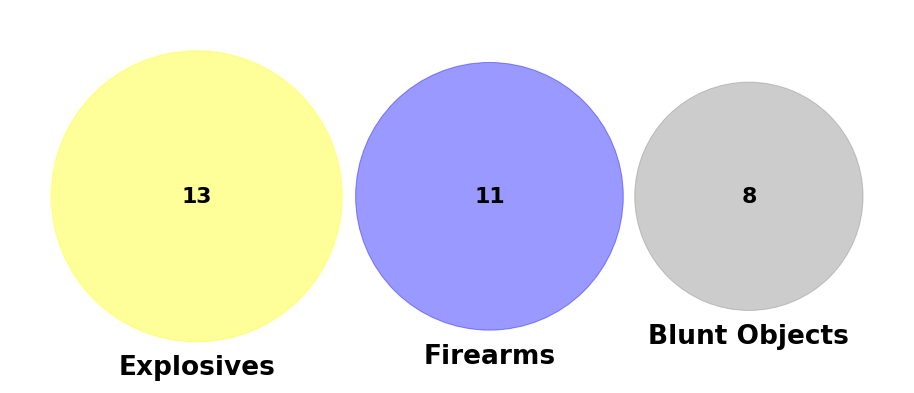

In [3]:
# !pip install matplotlib-venn
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3, venn3_circles

from pylab import rcParams          
rcParams['figure.figsize'] = 16, 10 

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

v = venn3(subsets = (# Explosives
                     13, 
                     # Firearms
                     11, 
                     # Firearms + Explosives
                     0, 
                     # Other
                     8, 
                     # Explosives + Other
                     0, 
                     # Firearms + Other
                     0,
                     # Explosives + Firearms + Other
                     0), 
                     set_labels = ('Explosives', 'Firearms', 'Blunt Objects'))
v.get_patch_by_id('100').set_color('yellow')
v.get_patch_by_id('010').set_color('blue')
v.get_patch_by_id('001').set_color('grey')


plt.show()

# savepath = os.path.join('./Latex_Compilation', 'work_home_venn.png')
# plt.savefig(savepath, bbox_inches='tight')

plt.clf()

### 1941 Venn Diagram

//anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


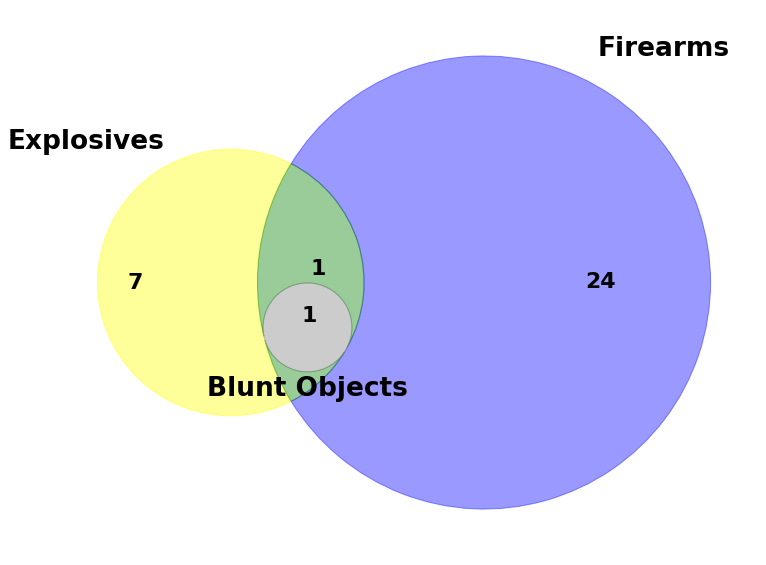

In [4]:
# !pip install matplotlib-venn
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3, venn3_circles

from pylab import rcParams          
rcParams['figure.figsize'] = 16, 10 

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

v = venn3(subsets = (# Explosives
                     7, 
                     # Firearms
                     24, 
                     # Firearms + Explosives
                     1, 
                     # Other
                     0, 
                     # Explosives + Other
                     0, 
                     # Firearms + Other
                     0,
                     # Explosives + Firearms + Other
                     1), 
                     set_labels = ('Explosives', 'Firearms', 'Blunt Objects'))
v.get_patch_by_id('100').set_color('yellow')
v.get_patch_by_id('110').set_color('green')
v.get_patch_by_id('111').set_color('grey')
v.get_patch_by_id('010').set_color('blue')

plt.show()

# savepath = os.path.join('./Latex_Compilation', 'work_home_venn.png')
# plt.savefig(savepath, bbox_inches='tight')

plt.clf()

In [94]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

year    = [1,2,3,4]
labels  = ['a', '1938', '1939', '1940', '1941']
lengend_labels = ['Firearms', 'Explosive Devices', 'Blunt Instruments']

other      = incident_count_by_weapon_year['Other_Weapons_Used'].tolist()[0:4]
firearms   = incident_count_by_weapon_year['Firearms_Used'].tolist()[0:4]
explosives = incident_count_by_weapon_year['Explosives_Used'].tolist()[0:4]

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

ax1.plot(year, firearms, linewidth=4, color ='#668cff')
ax1.plot(year, explosives, linewidth=4, color ='#ff1a1a')
ax1.plot(year, other, linewidth=4, color ='#999999')

# plt.xlabel('Year', fontsize=30)
plt.ylabel('# of Incidents', fontsize=32)

plt.title('Number of Terrorist Incidents by Weapon Type', fontsize=38, y=1.0)

ax1.xaxis.set_major_locator(MaxNLocator(4))
plt.xticks(fontsize=30, rotation=25)
ax1.set_xticklabels(labels)
ax1.grid(True)
ax1.legend(lengend_labels, loc=2)

# plt.show()
plt.savefig('./images/incidents_by_weapon_typoe_line_plot.png')
plt.clf()

In [6]:
# percentage_df = concident_count_by_weapon_year.copy()
# percentage_df['Percent with Explosives'] = ((percentage_df['Explosives_Used']/
#                                             percentage_df['Total_Incidents'])*100).\
#                                             apply(lambda x: round(x,2))
# percentage_df['Percent with Firearms'] = ((percentage_df['Firearms_Used']/percentage_df['Total_Incidents'])*100).\
#                                             apply(lambda x: round(x,2))
# percentage_df['Percent with Other Weapons'] = ((percentage_df['Other_Weapons_Used']/
#                                                percentage_df['Total_Incidents'])*100).\
#                                                apply(lambda x: round(x,2))
# percentage_df = percentage_df[['Percent with Explosives', 'Percent with Firearms', 'Percent with Other Weapons']]
# percentage_df

In [7]:
# percentage_df.to_csv('percentage_df.csv')